In [1]:
!pip install simpletransformers

#SWITCH TO GPU RUNTIME AND RUN THIS CELL
#RESTART RUNTIME WHEN DOING FIRST TIME

     |████████████████████████████████| 247 kB 5.6 MB/s 
     |████████████████████████████████| 3.1 MB 32.2 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 3.3 MB 25.1 MB/s 
     |████████████████████████████████| 1.2 MB 51.3 MB/s 
     |████████████████████████████████| 298 kB 48.3 MB/s 
     |████████████████████████████████| 1.7 MB 32.3 MB/s 
     |████████████████████████████████| 9.1 MB 14.9 MB/s 
     |████████████████████████████████| 596 kB 35.1 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 895 kB 46.4 MB/s 
     |████████████████████████████████| 140 kB 47.3 MB/s 
     |████████████████████████████████| 180 kB 43.5 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 243 kB 41.8 MB/s 
     |████████████████████████████████| 1.1 MB 38.7 MB/s 
     |█████████████████

In [2]:
import pandas as pd
earthquake=pd.read_csv("https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_a47a32f4144e4c0b9bf5505967c87853.csv")
flood=pd.read_csv("https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_b0834f4bc821415e82a5981cf251a69d.csv")
hurricane=pd.read_csv("https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_6e3a5a63ab3a4b8eaa37ae30f736f0ae.csv")
crisis3=pd.read_csv("https://0f41bdd6-d0a9-458e-937c-838e849bb6f4.usrfiles.com/ugd/0f41bd_520705b60d3149cf990572133108dffc.csv")
earthquake_tweets=earthquake[["tweets"]]
flood_tweets=flood[["tweets"]]
hurricane_tweets=hurricane[["tweets"]]
crisis3_tweets=crisis3[["tweets"]]

# tweets=[element for i, element in enumerate(tweets) if i not in [332,4986]]
# len(tweets)

In [3]:
from simpletransformers.language_representation import RepresentationModel

model=RepresentationModel(
    model_type="bert",
    model_name="bert-base-cased",
    use_cuda=True
)

word_vectors_earthquake=model.encode_sentences(earthquake_tweets.values.flatten().tolist(),combine_strategy="mean")
word_vectors_flood=model.encode_sentences(flood_tweets.values.flatten().tolist(),combine_strategy="mean")
word_vectors_hurricane=model.encode_sentences(hurricane_tweets.astype(str).values.flatten().tolist(),combine_strategy="mean")
word_vectors_crisis3=model.encode_sentences(crisis3_tweets.values.astype(str).flatten().tolist(),combine_strategy="mean")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Now Trying SVM over it

In [4]:
from sklearn.model_selection import train_test_split
## Uncomment if need compressed embeddings
# X=[]
# for id in data["id"]:
#   X.append(final_pca_embeddings[id])
# y=list(data['label'])

##  Uncomment if all embeddings
earthquake_X_train, earthquake_X_test, earthquake_y_train, earthquake_y_test = train_test_split(
    word_vectors_earthquake, list(earthquake['label']), test_size=0.2,shuffle=True)

flood_X_train, flood_X_test, flood_y_train, flood_y_test = train_test_split(
    word_vectors_flood, list(flood['label']), test_size=0.2,shuffle=True)

hurricane_X_train, hurricane_X_test, hurricane_y_train, hurricane_y_test = train_test_split(
    word_vectors_hurricane, list(hurricane['label']), test_size=0.2,shuffle=True)

crisis3_X_train, crisis3_X_test, crisis3_y_train, crisis3_y_test = train_test_split(
    word_vectors_crisis3, list(crisis3['label']), test_size=0.2,shuffle=True)


**TRAIN ON EARTHQUAKE**

In [5]:
from sklearn import svm
clf = svm.SVC(cache_size=10000,class_weight="balanced")

clf.fit(earthquake_X_train, earthquake_y_train) 

SVC(cache_size=10000, class_weight='balanced')

*TEST ON EARTHQUAKE*

              precision    recall  f1-score   support

           0     0.9428    0.8857    0.9134      1339
           1     0.6562    0.8022    0.7219       364

    accuracy                         0.8679      1703
   macro avg     0.7995    0.8440    0.8176      1703
weighted avg     0.8815    0.8679    0.8724      1703



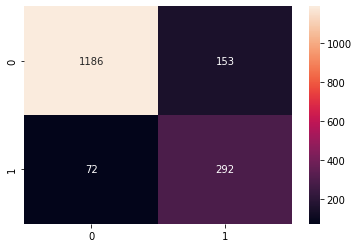

In [6]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(earthquake_X_test)
print(classification_report(earthquake_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(earthquake_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON HURRICANE*

              precision    recall  f1-score   support

           0     0.8736    0.9082    0.8906       784
           1     0.7012    0.6213    0.6589       272

    accuracy                         0.8343      1056
   macro avg     0.7874    0.7647    0.7747      1056
weighted avg     0.8292    0.8343    0.8309      1056



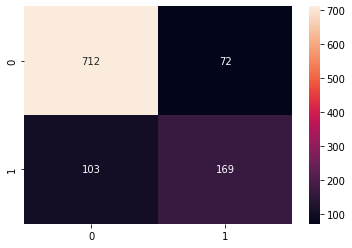

In [7]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(hurricane_X_test)
print(classification_report(hurricane_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(hurricane_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON FLOODS*

              precision    recall  f1-score   support

           0     0.9396    0.7814    0.8532       398
           1     0.7752    0.9375    0.8487       320

    accuracy                         0.8510       718
   macro avg     0.8574    0.8595    0.8509       718
weighted avg     0.8663    0.8510    0.8512       718



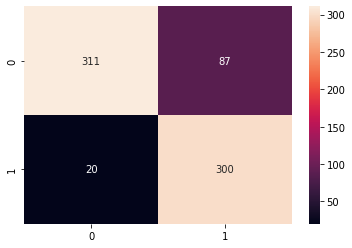

In [8]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(flood_X_test)
print(classification_report(flood_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(flood_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON 3CRISIS*

              precision    recall  f1-score   support

           0     0.9321    0.8852    0.9080      2560
           1     0.7187    0.8199    0.7659       916

    accuracy                         0.8680      3476
   macro avg     0.8254    0.8525    0.8370      3476
weighted avg     0.8759    0.8680    0.8706      3476



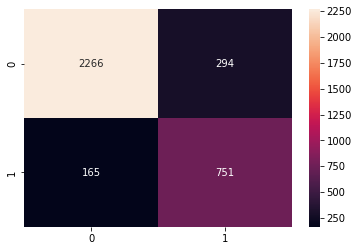

In [9]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(crisis3_X_test)
print(classification_report(crisis3_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(crisis3_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

**TRAIN ON HURRICANE**

In [10]:
from sklearn import svm
clf = svm.SVC(cache_size=10000,class_weight="balanced")

clf.fit(hurricane_X_train, hurricane_y_train) 

SVC(cache_size=10000, class_weight='balanced')

*TEST ON EARTHQUAKE*

              precision    recall  f1-score   support

           0     0.9264    0.6863    0.7885      1339
           1     0.4093    0.7995    0.5414       364

    accuracy                         0.7105      1703
   macro avg     0.6678    0.7429    0.6649      1703
weighted avg     0.8159    0.7105    0.7357      1703



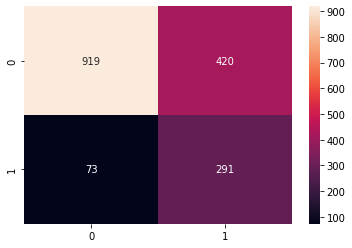

In [11]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(earthquake_X_test)
print(classification_report(earthquake_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(earthquake_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON HURRICANE*

              precision    recall  f1-score   support

           0     0.9347    0.8584    0.8949       784
           1     0.6696    0.8272    0.7401       272

    accuracy                         0.8504      1056
   macro avg     0.8022    0.8428    0.8175      1056
weighted avg     0.8664    0.8504    0.8551      1056



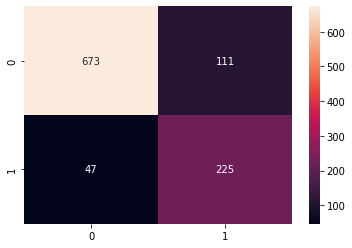

In [12]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(hurricane_X_test)
print(classification_report(hurricane_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(hurricane_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON FLOODS*

              precision    recall  f1-score   support

           0     0.9167    0.8015    0.8552       398
           1     0.7865    0.9094    0.8435       320

    accuracy                         0.8496       718
   macro avg     0.8516    0.8554    0.8494       718
weighted avg     0.8586    0.8496    0.8500       718



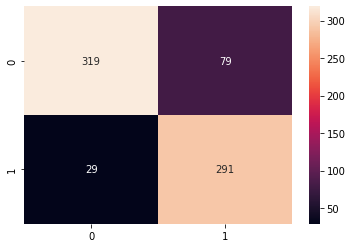

In [13]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(flood_X_test)
print(classification_report(flood_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(flood_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON 3CRISIS*

              precision    recall  f1-score   support

           0     0.9455    0.7652    0.8459      2560
           1     0.5719    0.8766    0.6922       916

    accuracy                         0.7946      3476
   macro avg     0.7587    0.8209    0.7690      3476
weighted avg     0.8470    0.7946    0.8054      3476



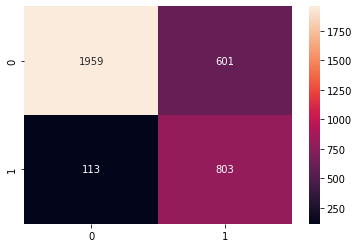

In [14]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(crisis3_X_test)
print(classification_report(crisis3_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(crisis3_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

**TRAIN ON FLOOD**

In [15]:
from sklearn import svm
clf = svm.SVC(cache_size=10000,class_weight="balanced")

clf.fit(flood_X_train, flood_y_train) 

SVC(cache_size=10000, class_weight='balanced')

*TEST ON EARTHQUAKE*

              precision    recall  f1-score   support

           0     0.9016    0.8693    0.8852      1339
           1     0.5752    0.6511    0.6108       364

    accuracy                         0.8227      1703
   macro avg     0.7384    0.7602    0.7480      1703
weighted avg     0.8319    0.8227    0.8265      1703



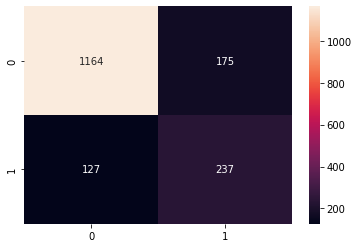

In [16]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(earthquake_X_test)
print(classification_report(earthquake_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(earthquake_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON HURRICANE*

              precision    recall  f1-score   support

           0     0.8069    0.9809    0.8854       784
           1     0.8544    0.3235    0.4693       272

    accuracy                         0.8116      1056
   macro avg     0.8306    0.6522    0.6774      1056
weighted avg     0.8191    0.8116    0.7783      1056



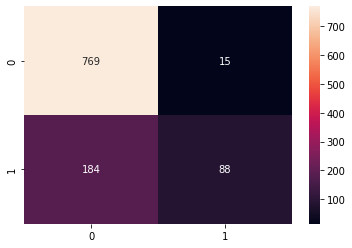

In [17]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(hurricane_X_test)
print(classification_report(hurricane_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(hurricane_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON FLOODS*

              precision    recall  f1-score   support

           0     0.8970    0.8970    0.8970       398
           1     0.8719    0.8719    0.8719       320

    accuracy                         0.8858       718
   macro avg     0.8844    0.8844    0.8844       718
weighted avg     0.8858    0.8858    0.8858       718



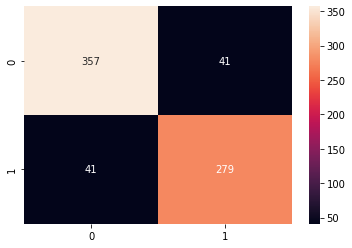

In [18]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(flood_X_test)
print(classification_report(flood_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(flood_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON 3CRISIS*

              precision    recall  f1-score   support

           0     0.8777    0.9164    0.8966      2560
           1     0.7335    0.6430    0.6853       916

    accuracy                         0.8444      3476
   macro avg     0.8056    0.7797    0.7909      3476
weighted avg     0.8397    0.8444    0.8409      3476



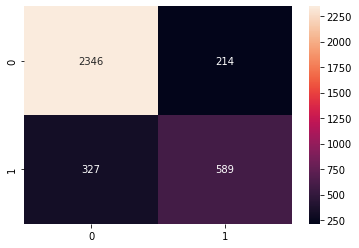

In [19]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(crisis3_X_test)
print(classification_report(crisis3_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(crisis3_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

**TRAIN ON 3 CRISIS**

In [20]:
from sklearn import svm
clf = svm.SVC(cache_size=10000,class_weight="balanced")

clf.fit(crisis3_X_train, crisis3_y_train) 

SVC(cache_size=10000, class_weight='balanced')

*TEST ON EARTHQUAKE*

              precision    recall  f1-score   support

           0     0.9422    0.9014    0.9214      1339
           1     0.6872    0.7967    0.7379       364

    accuracy                         0.8790      1703
   macro avg     0.8147    0.8491    0.8296      1703
weighted avg     0.8877    0.8790    0.8822      1703



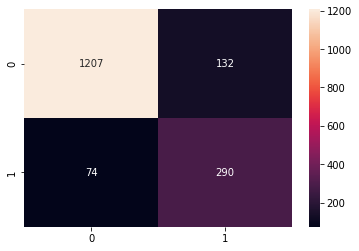

In [21]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(earthquake_X_test)
print(classification_report(earthquake_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(earthquake_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON HURRICANE*

              precision    recall  f1-score   support

           0     0.9341    0.8673    0.8995       784
           1     0.6829    0.8235    0.7467       272

    accuracy                         0.8561      1056
   macro avg     0.8085    0.8454    0.8231      1056
weighted avg     0.8694    0.8561    0.8601      1056



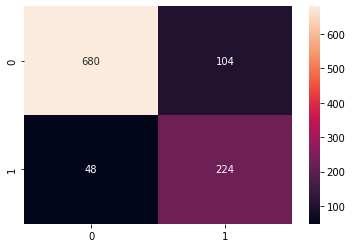

In [22]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(hurricane_X_test)
print(classification_report(hurricane_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(hurricane_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON FLOODS*

              precision    recall  f1-score   support

           0     0.9481    0.8266    0.8832       398
           1     0.8140    0.9437    0.8741       320

    accuracy                         0.8788       718
   macro avg     0.8811    0.8852    0.8787       718
weighted avg     0.8884    0.8788    0.8792       718



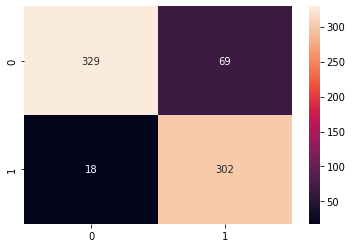

In [23]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(flood_X_test)
print(classification_report(flood_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(flood_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

*TEST ON 3CRISIS*

              precision    recall  f1-score   support

           0     0.9429    0.8773    0.9089      2560
           1     0.7130    0.8515    0.7761       916

    accuracy                         0.8705      3476
   macro avg     0.8279    0.8644    0.8425      3476
weighted avg     0.8823    0.8705    0.8739      3476



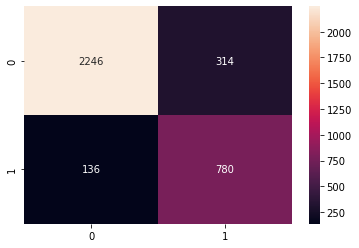

In [24]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(crisis3_X_test)
print(classification_report(crisis3_y_test, predictions,digits=4))
cf_matrix = confusion_matrix(crisis3_y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')

# Test your own string 

In [25]:
sentence="Waves of happiness sweeping the household"
X=model.encode_sentences([sentence],combine_strategy="mean")
if clf.predict(X)[0]==1:
  print("Critical Tweet")
else:
  print("Not a Critical Tweet")

Not a Critical Tweet
